In [2]:
# Preliminary imports
import os
import pandas as pd
from pathlib import Path
import numpy as np
os.environ['OPM_NUM_THREADS'] = '1'

In [12]:
# Read column names from file and drop MYOPIC.
file_path = Path("./Resources/myopia.csv")
cols = list(pd.read_csv(file_path, nrows=1))
# print(cols)
myopia_df = pd.read_csv(file_path, usecols=[i for i in cols if i != 'MYOPIC'])
myopia_df.head(10)
mcols = list(myopia_df.columns)
print(mcols)


['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']


In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', \
    'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

# print(scaled_data)

In [14]:
# Are the shapes aligned?
print(myopia_df.shape)
print(scaled_data.shape)
myopia_df.reset_index(drop=True, inplace=True)
#myopia_df

tsf_myopia_df = pd.DataFrame(scaled_data, columns=myopia_df.columns[0:])
tsf_myopia_df.to_csv('./Resources/transformed_myopia.csv', index=False)


(618, 14)
(618, 14)


In [107]:
# Time for clusters!
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
file = Path('./Resources/transformed_myopia.csv')
tsf_myopia = pd.read_csv(file)
tsf_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [119]:
# Plot the clusters using an elbow curve
inertia = []
k = list(range(1, 14))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsf_myopia)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


c:\Users\cbatl\Anaconda3\envs\-Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361
5,6,5817.591226
6,7,5634.336407
7,8,5434.664962
8,9,5295.164517
9,10,5118.628831


In [126]:
# What is the % change in clusters?
df_elbow['inertia'].pct_change()

0          NaN
1    -0.133482
2    -0.102042
3    -0.054932
4    -0.043869
5    -0.043660
6    -0.031500
7    -0.035438
8    -0.025669
9    -0.033339
10   -0.026093
11   -0.031566
12   -0.015744
Name: inertia, dtype: float64

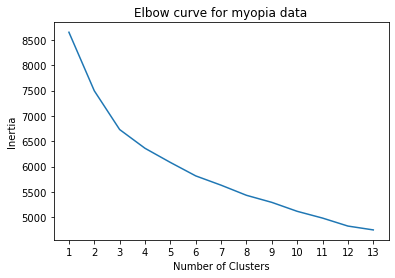

In [109]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,14))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

# I beleive the optimal number of clusters = 4

#### I believe the optimal number of clusters is 4

#### PCA Analysis -- Can we get accurate results with fewer dimensions?

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
pca = pd.read_csv('./Resources/myopia.csv')
pca.head()
pca_df = pca.drop(['MYOPIC'], axis=1)
pca_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [20]:
# Initialize the PCA model
pca_cmp = PCA(n_components=2)

# Get two principal components for the data
myopia_pca = pca_cmp.fit_transform(pca_df)

# Transform PCA data to a data frame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=['principal component 1', 'principal component 2']
)

df_myopia_pca.head()

,principal component 1,principal component 2
0,12.138059,31.636212
1,-15.268363,-6.095695
2,-11.662239,3.755105
3,11.235886,4.012566
4,-22.446506,4.580916


In [22]:
# Fetch the explained variance
pca_cmp.explained_variance_ratio_

array([0.72557249, 0.16081428])

### According to the explained variance, we have approximately 88% of the information in the original dataset

In [23]:
# Initialize the PCA model
pca_cmp = PCA(n_components=3)

# Get two principal components for the data
myopia_pca = pca_cmp.fit_transform(pca_df)

# Transform PCA data to a data frame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=['principal component 1', 'principal component 2', 'principal component 3']
)

df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


In [24]:
pca_cmp.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215])

### The explained variance with three components increases to 95%. I think three is the optimal number.

In [26]:
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict the clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column
df_myopia_pca['class'] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,12.138059,31.636212,-4.526625,2
1,-15.268363,-6.095695,1.207074,0
2,-11.662239,3.755105,2.808212,0
3,11.235886,4.012566,-8.179565,2
4,-22.446506,4.580916,-1.817501,0


In [29]:
import plotly.express as px
fig = px.scatter_3d(
    df_myopia_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()